# Find nearest Latitude and Longitude grid box 
Key Tools Demonstrated:
- Numpy: maximum
- matplotlib
- Basemap

I deal a lot with weather model output (specifically HRRR model data) and need to verify a point in the gridded data with observational data at a point. The difficulty is that weather stations I get observation data from are not located at the exact grid points as the model output. The hard part to make a comparison is finding the index value of a latitude and longitude grid point nearest to the observation location. This is made easy with numpy's maximum function (not max).

First, you need to have three arrays of gridded model data:
1. 2D array of grid latitude
2. 2D array of grid longitude
3. 2D array of grid data, such as temperature.

In this example, I create some data, but I usually load the data form grib2, netcdf, or hdf5 files.

Second, you need to know the latitude and longitude of the station or point you want to pluck from the model grid.

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

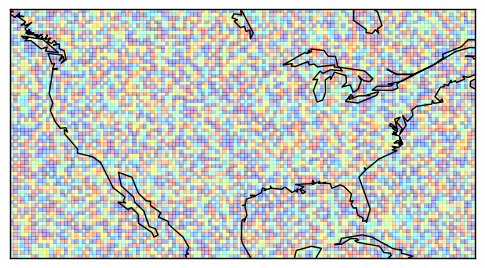

In [10]:
# Latitudes
longitude = np.arange(-130, -65, .5)

# Longitudes
latitude = np.arange(20, 55, .5)

# Use meshgrid to make 2D arrays of the lat/lon data
lats, lons = np.meshgrid(latitude, longitude)

# A 2D numpy array of your temperatures, or some other variable, that matches the lat/lon grid
# Generate randomized test data for now
data = np.random.randint(50, size=np.shape(lats))

Next you need to know the latitude and longitude for the observation point. We are looking for the nearest grid point in the lat and lon arrays for that grid point.

In [5]:
# Stations latitude longitude, the nearest gridpoint we are looking for
stn_lat = 40.3242
stn_lon = -110.2962

Now lets plot the simulated gridded model data and the point of interest

In [ ]:
# Create a basemap to show the data
m = Basemap(llcrnrlon=longitude[0],llcrnrlat=latitude[0],urcrnrlon=longitude[-1],urcrnrlat=latitude[-1],)
m.drawcoastlines()
m.pcolormesh(lons, lats, data, alpha=.3)
m.scatter(stn_lon, stn_l)

Now find the absolute value of the difference between the  station's lat/lon with every point in the grid. This tells us how close a point is to the particular latitude and longitude.

In [77]:
abslat = np.abs(lats-stn_lat)
abslon= np.abs(lons-stn_lon)

If you plot abslat and abslon, you'll see what we have done...we have created two new arrays with that tell us how close each latitude and longitude is to the grid point we are interested in.

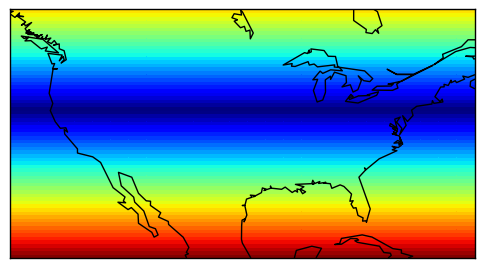

In [78]:
m.drawcoastlines()
m.pcolormesh(lons, lats, abslat)

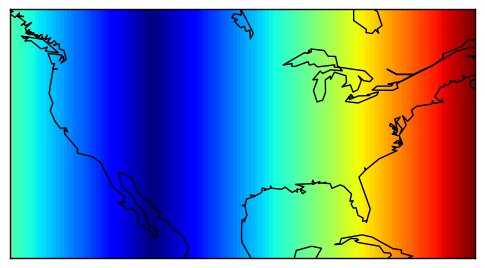

In [79]:
m.drawcoastlines()
m.pcolormesh(lons, lats, abslon)

Now we need to combine these two results.
We will use numpy.maximum, which takes two arrays and finds the local maximum.

In [80]:
c = np.maximum(abslon, abslat)

The dark blue point is the nearest grid location to our station. You can find the index location on the grid of this by using the min function.

2771


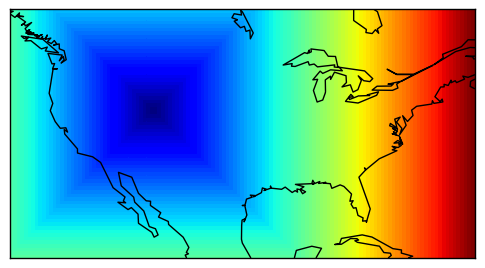

In [81]:
latlon_idx = np.argmin(c)

m.drawcoastlines()
m.pcolormesh(lons, lats, c)

print latlon_idx

Now, this latitude/longitude index value is the index for a flattened array, so when you look for that same index value in, say, your temperature array, you should flatten the array to pluck out the value at that point.

In [82]:
grid_temp = data.flat[latlon_idx]

If you don't like flattened arrays, you can also get the row/column index like this

Value of 40 at 40.5 -110.5
40.5 -110.5 is the nearest grid to 40.3242 -110.2962


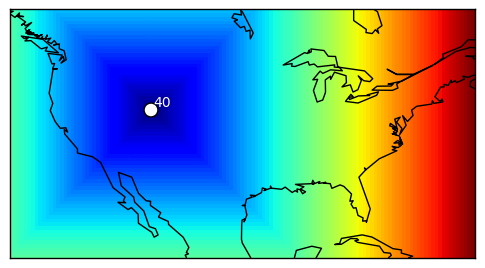

In [89]:
x, y = np.where(c == np.min(c))
grid_data = data[x[0], y[0]]
grid_lat = lats[x[0], y[0]]
grid_lon = lons[x[0], y[0]]

print "Value of %s at %s %s" % (grid_data, grid_lat, grid_lon)
print "%s %s is the nearest grid to %s %s" % (grid_lat, grid_lon, stn_lat, stn_lon)

m.drawcoastlines()
m.pcolormesh(lons, lats, c)
m.scatter(grid_lon, grid_lat, s=100, c='w')
plt.text(grid_lon+.5, grid_lat+.5, grid_data, color='w')

And there you have it! 